# Correlation and Cointegration Analysis for AUD/USD and NZD/USD

In this notebook, we will calculate and analyze the correlation and cointegration between the AUD/USD and NZD/USD currency pairs. This analysis helps to understand the relationship and long-term equilibrium between these two major forex pairs, which can be valuable for trading strategies and risk management.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df_aud = pd.read_csv('AUDUSD1440.csv', sep='\t', names=column_names, parse_dates=['datetime'], index_col='datetime')
df_nzd = pd.read_csv('NZDUSD1440.csv', sep='\t', names=column_names, parse_dates=['datetime'], index_col='datetime')

In [3]:
df_aud

,open,high,low,close,volume
datetime,,,,,
2009-05-21,0.77695,0.78213,0.76683,0.77933,83604
2009-05-22,0.77928,0.78673,0.77716,0.78386,66125
2009-05-24,0.77986,0.78028,0.77721,0.77806,2743
2009-05-25,0.77810,0.78253,0.77447,0.77768,26552
2009-05-26,0.77775,0.78869,0.77026,0.78708,81412
...,...,...,...,...,...
2025-06-09,0.64984,0.65334,0.64934,0.65161,54600
2025-06-10,0.65163,0.65328,0.64895,0.65284,77674
2025-06-11,0.65286,0.65455,0.64956,0.65083,75524


In [4]:
df_nzd

,open,high,low,close,volume
datetime,,,,,
2009-06-01,0.65370,0.65370,0.64744,0.64825,13199
2009-06-02,0.64830,0.65940,0.64455,0.65370,162024
2009-06-03,0.65360,0.65560,0.62685,0.63450,188425
2009-06-04,0.63450,0.63775,0.62165,0.63180,143543
2009-06-05,0.63180,0.64185,0.62520,0.62610,128203
...,...,...,...,...,...
2025-06-09,0.60214,0.60651,0.60131,0.60487,71806
2025-06-10,0.60488,0.60616,0.60274,0.60590,79006
2025-06-11,0.60592,0.60656,0.60213,0.60350,73842


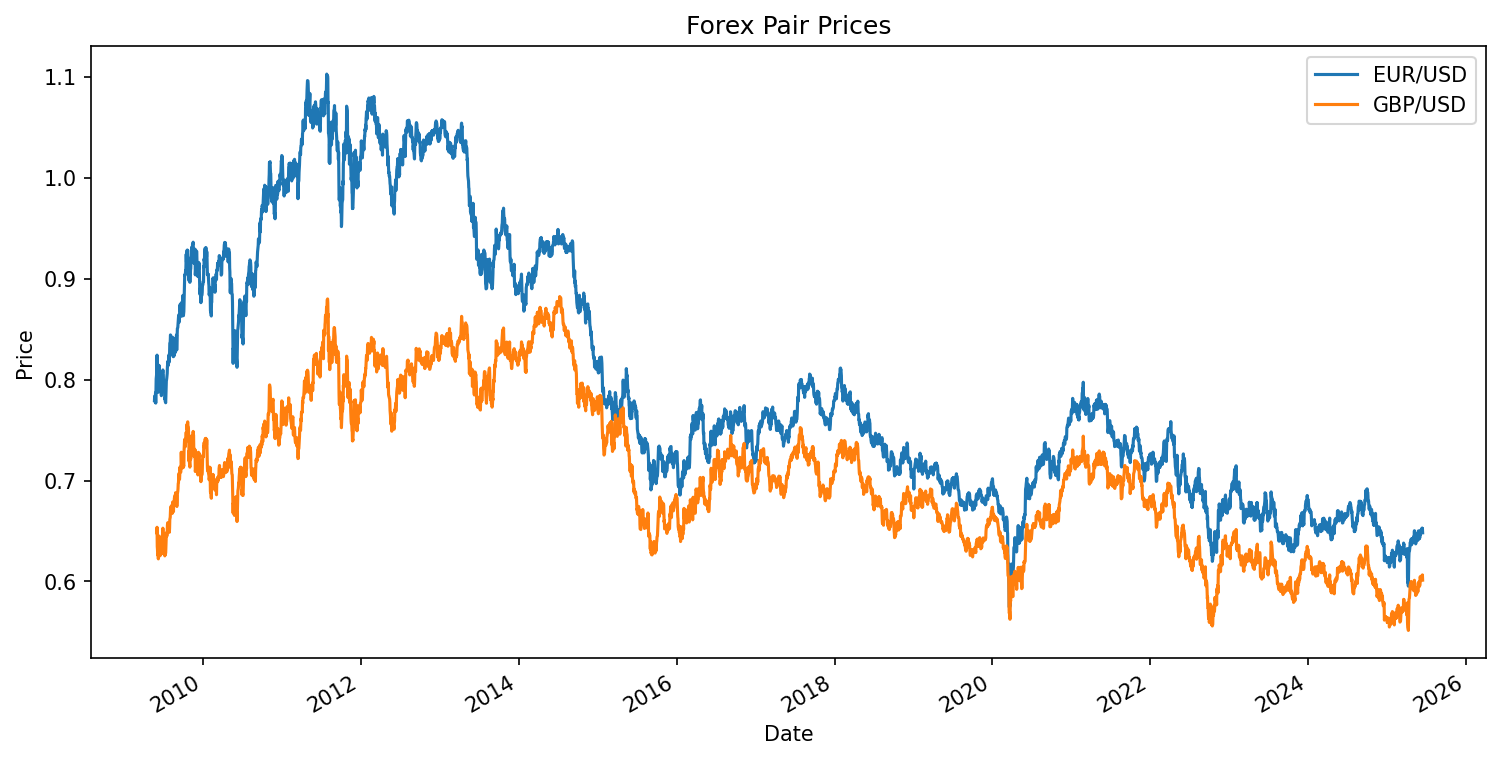

In [5]:
plt.figure(dpi=150)
df_aud['close'].plot(label='EUR/USD', figsize=(12, 6))
df_nzd['close'].plot(label='GBP/USD', figsize=(12, 6))
plt.title('Forex Pair Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
correlation = df_nzd['close'].corr(df_aud['close'])
string = ""
if(correlation > 0.7 and correlation <= 1):
    string = "high"
elif(correlation > 0.3 and correlation <= 0.7):
    string = "medium"
else: string = "low"

print(f"Correlation between AUD/USD and NZD/USD: {correlation:.4f} ({string})")

Correlation between AUD/USD and NZD/USD: 0.8911 (high)


In [7]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [8]:
combine = pd.concat([df_aud,df_nzd],axis=1)
# Make sure to rename columns rather than just all "adjusted close"
combine.columns = ['GBP/USD_close','GBP/USD_open','GBP/USD_high','GBP/USD_low','GBP/USD_volume',
                   'EUR/USD_close','EUR/USD_open','EUR/USD_high','EUR/USD_low','EUR/USD_volume']
combine.dropna()

,GBP/USD_close,GBP/USD_open,GBP/USD_high,GBP/USD_low,GBP/USD_volume,EUR/USD_close,EUR/USD_open,EUR/USD_high,EUR/USD_low,EUR/USD_volume
datetime,,,,,,,,,,
2009-06-01,0.80537,0.81531,0.80369,0.81109,77012.0,0.65370,0.65370,0.64744,0.64825,13199.0
2009-06-02,0.81114,0.82466,0.80499,0.82436,88225.0,0.64830,0.65940,0.64455,0.65370,162024.0
2009-06-03,0.82434,0.82632,0.79316,0.80036,84821.0,0.65360,0.65560,0.62685,0.63450,188425.0
2009-06-04,0.80031,0.80901,0.78758,0.80356,75172.0,0.63450,0.63775,0.62165,0.63180,143543.0
2009-06-05,0.80366,0.81231,0.79166,0.79317,55825.0,0.63180,0.64185,0.62520,0.62610,128203.0
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,0.64984,0.65334,0.64934,0.65161,54600.0,0.60214,0.60651,0.60131,0.60487,71806.0
2025-06-10,0.65163,0.65328,0.64895,0.65284,77674.0,0.60488,0.60616,0.60274,0.60590,79006.0
2025-06-11,0.65286,0.65455,0.64956,0.65083,75524.0,0.60592,0.60656,0.60213,0.60350,73842.0


In [9]:
# delete NaN rows in series
combine_clean = combine[['EUR/USD_close', 'GBP/USD_close']].dropna()

# test cointegration
# last 5 years of data
coint_t, p_value, critical_values = coint(combine_clean['EUR/USD_close']['2020-01-01':], combine_clean['GBP/USD_close']['2020-01-01':])

# แสดงผลลัพธ์
print("Cointegration Test Statistic:", coint_t)
print("P-value:", p_value)
print("Critical Values:", critical_values)

if p_value < 0.05:  # if ci 5%
    print("Series have Cointegration")
else:
    print("Series do not have Cointegration")

Cointegration Test Statistic: -3.4404396434840168
P-value: 0.0380532764541375
Critical Values: [-3.9028863  -3.33972231 -3.04694283]
Series have Cointegration


# From this, so we will choose NZD/USD , AUD/USD instaed of EUR/USD , GBP/USD